In [2]:
# All required libraries are imported.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [4]:
# Checking the null values
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [5]:
# check how many crops we have
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(crops[["N", "P", "K", "ph"]], crops["crop"], test_size = 0.2, random_state = 42)

In [7]:
# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:  
    log_reg = LogisticRegression(max_iter = 2000, multi_class = "multinomial")
    log_reg.fit(X_train[[feature]], y_train)  
    y_pred = log_reg.predict(X_test[[feature]])  
    f1 = f1_score(y_test, y_pred, average = "weighted")
    print(f"F1-score for {feature}: {f1}")
    

F1-score for N: 0.10187518380875378


C:\Users\Alok Shukla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.13770290642069416
F1-score for K: 0.20349279438334908
F1-score for ph: 0.04532731061152114


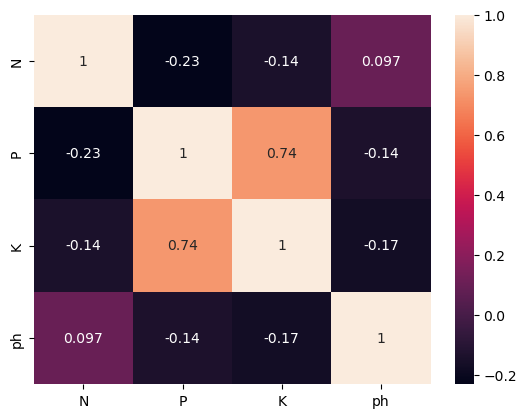

In [8]:
# calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()
sns.heatmap(crops_corr, annot=True)
plt.show()

### To avoid collinearity Drop one of the correlate feature, In this case we dropped 'P'

In [9]:
# final features
final_features = ["N", "K", "ph"]
X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops["crop"], test_size = 0.2, random_state = 42)

In [10]:
# Train the new model
log_reg = LogisticRegression(max_iter = 2000, multi_class = "multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average = "weighted")

C:\Users\Alok Shukla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Model Performance
print(f"F1-score  {model_performance}")

F1-score  0.5545980622538454


<Axes: >

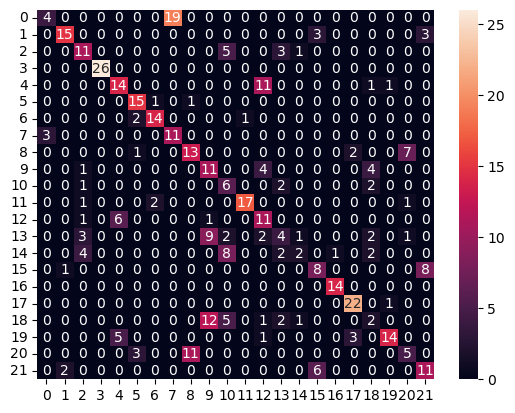

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot = True)